In [527]:
import pandas as pd 
import numpy as np 
import sqlite3

In [528]:
df = pd.read_csv("../Data/tmdb.movies.csv")
df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [530]:
#release_date column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [531]:
# drop the unnamed column
df = df.drop(columns=['Unnamed: 0'])

In [532]:
df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [533]:
df.duplicated().sum()

1020

In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.8+ MB


In [535]:
df1 = pd.read_csv("../Data/bom.movie_gross.csv")
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [536]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [537]:
df1.duplicated().sum()

0

In [538]:
df1.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [539]:
#foreign gross to numeric
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'], errors='coerce')

In [540]:
df1.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [541]:
#find a way to fill in missing foreign gross, maybe drop the rest so i can keep enough data to work with/ check if movie_budgets can be of help
df1 = df1.dropna(subset=['studio'])


In [542]:
df1 = df1.dropna(subset=['domestic_gross'])

In [543]:
#year to datetime
df1['year'] = pd.to_datetime(df1['year'], format='%Y', errors='coerce')

In [544]:
# mean of foreign gross per year in non-exponential format truncated to 0 decimal places
mean_foreign_gross_per_year = df1.groupby(df1['year'].dt.year)['foreign_gross'].mean().reset_index()
mean_foreign_gross_per_year['foreign_gross'] = mean_foreign_gross_per_year['foreign_gross'].apply(lambda x: '{:,.0f}'.format(x))
print(mean_foreign_gross_per_year)


   year foreign_gross
0  2010    46,653,802
1  2011    54,009,886
2  2012    69,971,132
3  2013    82,901,211
4  2014    72,464,392
5  2015    81,039,321
6  2016    98,861,403
7  2017   113,232,568
8  2018   101,595,867


In [545]:
# mode of foreign gross per year
mode_foreign_gross_per_year = df1.groupby(df1['year'].dt.year)['foreign_gross'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan).reset_index()
print(mode_foreign_gross_per_year)

   year  foreign_gross
0  2010      1200000.0
1  2011      3200000.0
2  2012      1200000.0
3  2013      5300000.0
4  2014      1200000.0
5  2015      1200000.0
6  2016      1000000.0
7  2017      1100000.0
8  2018      2500000.0


In [546]:
#median of foreign gross per year
median_foreign_gross_per_year = df1.groupby(df1['year'].dt.year)['foreign_gross'].median().reset_index()
print(median_foreign_gross_per_year)

   year  foreign_gross
0  2010      7150000.0
1  2011     12900000.0
2  2012     13800000.0
3  2013     29150000.0
4  2014     16100000.0
5  2015     25600000.0
6  2016     33100000.0
7  2017     34850000.0
8  2018     28300000.0


In [547]:
comparison_df = mean_foreign_gross_per_year.merge(mode_foreign_gross_per_year, on='year', suffixes=('_mean', '_mode'))
comparison_df = comparison_df.merge(median_foreign_gross_per_year, on='year')
comparison_df = comparison_df.rename(columns={'foreign_gross': 'median'})
print(comparison_df)

   year foreign_gross_mean  foreign_gross_mode      median
0  2010         46,653,802           1200000.0   7150000.0
1  2011         54,009,886           3200000.0  12900000.0
2  2012         69,971,132           1200000.0  13800000.0
3  2013         82,901,211           5300000.0  29150000.0
4  2014         72,464,392           1200000.0  16100000.0
5  2015         81,039,321           1200000.0  25600000.0
6  2016         98,861,403           1000000.0  33100000.0
7  2017        113,232,568           1100000.0  34850000.0
8  2018        101,595,867           2500000.0  28300000.0


In [548]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3356 non-null   object        
 1   studio          3356 non-null   object        
 2   domestic_gross  3356 non-null   float64       
 3   foreign_gross   2002 non-null   float64       
 4   year            3356 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 157.3+ KB


In [549]:
df1.isna().sum()


title                0
studio               0
domestic_gross       0
foreign_gross     1354
year                 0
dtype: int64

In [550]:
df2 = pd.read_csv("../Data/tn.movie_budgets.csv")
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [551]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [552]:
df2.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [553]:
df2.duplicated().sum()

0

In [554]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [555]:
#drop the $ and , from production_budget, domestic_gross and worldwide_gross columns
df2['production_budget'] = df2['production_budget'].str.replace('$','').str.replace(',','')
df2['domestic_gross'] = df2['domestic_gross'].str.replace('$','').str.replace(',','')
df2['worldwide_gross'] = df2['worldwide_gross'].str.replace('$','').str.replace(',','') 


In [556]:
# release date to datetime. production budget, domestic gross and worldwide gross  to numeric
df2['release_date'] = pd.to_datetime(df2['release_date'], errors='coerce')
df2['production_budget'] = pd.to_numeric(df2['production_budget'], errors='coerce')
df2['domestic_gross'] = pd.to_numeric(df2['domestic_gross'], errors='coerce')
df2['worldwide_gross'] = pd.to_numeric(df2['worldwide_gross'], errors='coerce')

In [557]:
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [558]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [559]:
conn = sqlite3.connect('../Data/im.db')
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [560]:
movie_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [561]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [562]:
movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [563]:
# drop all nulls
movie_basics = movie_basics.dropna()
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [564]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.8+ MB


In [565]:
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


In [580]:
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [583]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [567]:
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [577]:
#check how many original_titles in movie_basics are also in df
common_titles = set(movie_basics['primary_title']).intersection(set(df['title']))
print(f'Number of common titles: {len(common_titles)}')

Number of common titles: 14620


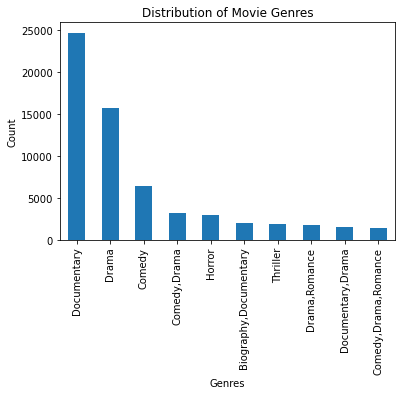

In [572]:
#create a hist bin the genres in movie_basics first 10``
genre_counts = movie_basics['genres'].value_counts().head(10)
import matplotlib.pyplot as plt
genre_counts.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')
plt.show()

In [578]:
#join the movie_basics and df on primary_title and title
merged_df = pd.merge(movie_basics, df, left_on='primary_title', right_on='title', how='inner')
merged_df.head()

,movie_id,primary_title,original_title_x,start_year,runtime_minutes,genres,genre_ids,id,original_language,original_title_y,popularity,release_date,title,vote_average,vote_count
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,"[35, 18]",299782,en,The Other Side of the Wind,9.800,2018-11-02,The Other Side of the Wind,7.0,64
1,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,[18],567662,en,Heaven & Hell,0.600,2018-11-06,Heaven & Hell,7.5,2
2,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy","[16, 28, 35, 10751]",116977,en,Foodfight!,4.705,2013-05-07,Foodfight!,2.1,46
3,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama","[35, 18]",323498,en,Return to Babylon,0.877,2013-08-11,Return to Babylon,7.0,1
4,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,[35],112074,en,Life's a Beach,1.206,2010-01-01,Life's a Beach,3.2,3


In [579]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21605 entries, 0 to 21604
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           21605 non-null  object        
 1   primary_title      21605 non-null  object        
 2   original_title_x   21605 non-null  object        
 3   start_year         21605 non-null  int64         
 4   runtime_minutes    21605 non-null  float64       
 5   genres             21605 non-null  object        
 6   genre_ids          21605 non-null  object        
 7   id                 21605 non-null  int64         
 8   original_language  21605 non-null  object        
 9   original_title_y   21605 non-null  object        
 10  popularity         21605 non-null  float64       
 11  release_date       21605 non-null  datetime64[ns]
 12  title              21605 non-null  object        
 13  vote_average       21605 non-null  float64       
 14  vote_c

In [581]:
#join movie_ratings and movie_basics on movie_id
merged_ratings = pd.merge(movie_ratings, movie_basics, left_on='movie_id', right_on='movie_id', how='inner')
merged_ratings.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [582]:
merged_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 65719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   averagerating    65720 non-null  float64
 2   numvotes         65720 non-null  int64  
 3   primary_title    65720 non-null  object 
 4   original_title   65720 non-null  object 
 5   start_year       65720 non-null  int64  
 6   runtime_minutes  65720 non-null  float64
 7   genres           65720 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.8+ MB


In [585]:
merged_ratings.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [586]:
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [588]:
# df and merged_ratings on title and primary_title
df_mergedratings = pd.merge(df, merged_ratings, left_on='title', right_on='primary_title', how='inner')
df_mergedratings.head()

,genre_ids,id,original_language,original_title_x,popularity,release_date,title,vote_average,vote_count,movie_id_x,...,runtime_minutes_x,genres_x,movie_id_y,averagerating_y,numvotes_y,primary_title_y,original_title,start_year_y,runtime_minutes_y,genres_y
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,tt0926084,...,146.0,"Adventure,Fantasy,Mystery",tt0926084,7.7,425530,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,"Adventure,Fantasy,Mystery"
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,...,98.0,"Action,Adventure,Animation",tt0892769,8.1,611299,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation"
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,...,124.0,"Action,Adventure,Sci-Fi",tt1228705,7.0,657690,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
3,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,tt1375666,...,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
4,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,tt0814255,...,118.0,"Adventure,Family,Fantasy",tt0814255,5.9,165108,Percy Jackson & the Olympians: The Lightning T...,Percy Jackson & the Olympians: The Lightning T...,2010,118.0,"Adventure,Family,Fantasy"


In [589]:
df_mergedratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30709 entries, 0 to 30708
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          30709 non-null  object        
 1   id                 30709 non-null  int64         
 2   original_language  30709 non-null  object        
 3   original_title_x   30709 non-null  object        
 4   popularity         30709 non-null  float64       
 5   release_date       30709 non-null  datetime64[ns]
 6   title              30709 non-null  object        
 7   vote_average       30709 non-null  float64       
 8   vote_count         30709 non-null  int64         
 9   movie_id_x         30709 non-null  object        
 10  averagerating_x    30709 non-null  float64       
 11  numvotes_x         30709 non-null  int64         
 12  primary_title_x    30709 non-null  object        
 13  original_title_y   30709 non-null  object        
 14  start_

In [590]:
# df and merged_ratings on title and primary_title left join
df_mergedratings = pd.merge(df, merged_ratings, left_on='title', right_on='primary_title', how='left')
df_mergedratings.head()

,genre_ids,id,original_language,original_title_x,popularity,release_date,title,vote_average,vote_count,movie_id_x,...,runtime_minutes_x,genres_x,movie_id_y,averagerating_y,numvotes_y,primary_title_y,original_title,start_year_y,runtime_minutes_y,genres_y
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,tt0926084,...,146.0,"Adventure,Fantasy,Mystery",tt0926084,7.7,425530,Harry Potter and the Deathly Hallows: Part 1,Harry Potter and the Deathly Hallows: Part 1,2010,146.0,"Adventure,Fantasy,Mystery"
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,tt0892769,...,98.0,"Action,Adventure,Animation",tt0892769,8.1,611299,How to Train Your Dragon,How to Train Your Dragon,2010,98.0,"Action,Adventure,Animation"
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,tt1228705,...,124.0,"Action,Adventure,Sci-Fi",tt1228705,7.0,657690,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi"
3,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,tt1375666,...,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
4,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229,tt0814255,...,118.0,"Adventure,Family,Fantasy",tt0814255,5.9,165108,Percy Jackson & the Olympians: The Lightning T...,Percy Jackson & the Olympians: The Lightning T...,2010,118.0,"Adventure,Family,Fantasy"


In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19301 entries, 0 to 19300
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          19301 non-null  object        
 1   id                 19301 non-null  int64         
 2   original_language  19301 non-null  object        
 3   original_title_x   19301 non-null  object        
 4   popularity         19301 non-null  float64       
 5   release_date       19301 non-null  datetime64[ns]
 6   title              19301 non-null  object        
 7   vote_average       19301 non-null  float64       
 8   vote_count         19301 non-null  int64         
 9   movie_id           19301 non-null  object        
 10  averagerating      19301 non-null  float64       
 11  numvotes           19301 non-null  int64         
 12  primary_title      19301 non-null  object        
 13  original_title_y   19301 non-null  object        
 14  start_